In [91]:
#Import basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Data preprocessing libraries
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

#Model training and Validation
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [92]:
#Importing the data set

df=pd.read_excel(r'C:\Users\Bias_correction_ucl.xlsx',parse_dates=['Date'])
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [93]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [94]:
df.shape

(7752, 25)

In [95]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

Observations:
    1.There are 7752 rows and 25 columns in the dataset.
    2.All the features are of float datatype except date,which needs to be converted 
    later.
    

In [97]:
#Checking null values

df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Finding:
1.there are null values present in many features.
2.75 null values are present for almost features,so check the corresponding 
row n column,if it matches drop the null value.

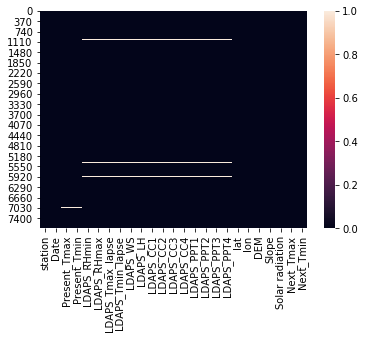

In [98]:
sns.heatmap(df.isnull())

In [99]:
#Checking null values in rows wise

for i in df.columns:
    print(df[df[i].isna()])

      station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaT          20.0          11.3    19.794666    58.936283   
7751      NaN  NaT          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM     Slope  \
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.370  0.098475   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.335  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8  

[2 rows x 25 columns]
      station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaT          20.0          11.3    19.794666    58.936283 

[75 rows x 25 columns]
      station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
1025      1.0 2013-08-10          27.1          24.5          NaN   
1026      2.0 2013-08-10          29.7          25.4          NaN   
1027      3.0 2013-08-10          29.1          25.9          NaN   
1028      4.0 2013-08-10          30.8          27.3          NaN   
1029      5.0 2013-08-10          29.7          25.7          NaN   
...       ...        ...           ...           ...          ...   
5945     21.0 2016-08-20          34.1          27.9          NaN   
5946     22.0 2016-08-20          34.3          27.7          NaN   
5947     23.0 2016-08-20          34.6          28.7          NaN   
5948     24.0 2016-08-20          35.0          28.6          NaN   
5949     25.0 2016-08-20          35.2          28.1          NaN   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
1025          NaN               NaN               NaN       NaN       N

[75 rows x 25 columns]
      station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
1025      1.0 2013-08-10          27.1          24.5          NaN   
1026      2.0 2013-08-10          29.7          25.4          NaN   
1027      3.0 2013-08-10          29.1          25.9          NaN   
1028      4.0 2013-08-10          30.8          27.3          NaN   
1029      5.0 2013-08-10          29.7          25.7          NaN   
...       ...        ...           ...           ...          ...   
5945     21.0 2016-08-20          34.1          27.9          NaN   
5946     22.0 2016-08-20          34.3          27.7          NaN   
5947     23.0 2016-08-20          34.6          28.7          NaN   
5948     24.0 2016-08-20          35.0          28.6          NaN   
5949     25.0 2016-08-20          35.2          28.1          NaN   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
1025          NaN               NaN               NaN       NaN       N

      station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
831       7.0 2013-08-02          29.6          25.8    76.202255   
856       7.0 2013-08-03           NaN           NaN    69.476059   
1073     24.0 2013-08-11          34.2          25.1    50.618851   
2465     16.0 2014-08-05          28.8          23.1    71.442566   
3696     22.0 2015-07-23          30.4          23.4    81.568771   
3714     15.0 2015-07-24          24.6          22.4    83.265244   
3739     15.0 2015-07-25           NaN           NaN    68.156593   
3886     12.0 2015-07-31           NaN           NaN    64.559479   
4205      6.0 2015-08-13          30.8          23.9    35.218002   
4230      6.0 2015-08-14           NaN           NaN    43.412582   
4255      6.0 2015-08-15           NaN           NaN    58.784390   
4280      6.0 2015-08-16           NaN           NaN    28.475870   
5656      7.0 2016-08-09          33.1          26.8    64.725151   
5681      7.0 2016-08-10          

Observation:
    the indexes is common for most features,so drop all null values.

In [100]:
#Dropping null values

print('Initial Shape:',df.shape)
df.dropna(axis=0,how='any',inplace=True)
print('Final Shape:',df.shape)

Initial Shape: (7752, 25)
Final Shape: (7588, 25)


In [101]:
#Checking null values
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

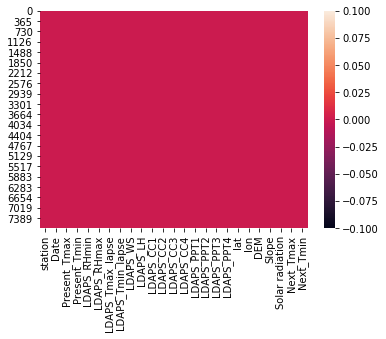

In [102]:
sns.heatmap(df.isnull())
plt.show()

## Statistical Summary

In [103]:
#Checking statistics of numerical variables
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


Observation:
    1.median is greater than mean in some features.
    2. if mean is greater than median then it is right skewed,if median is greater than
    mean data is left skewed.
    3.difference between 75% and 100% varies largely in some features,hence outliers 
    will be present.

In [104]:
#Checking the correlation

df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


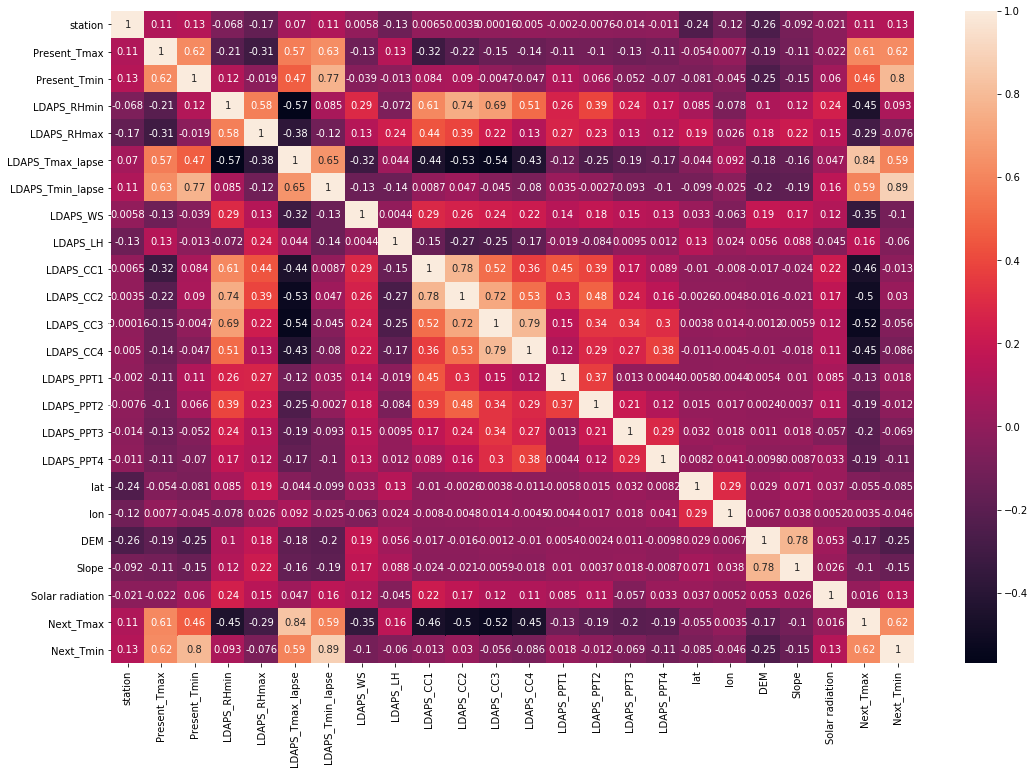

In [105]:
#Checking correlation using heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True)

In [106]:
#Separating categorical columns and numerical columns
cat_df,num_df=[],[]
for i in df:
    if df[i].dtypes=='object':
        cat_df.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else:print('Others>',i)
        
print('Total number of features:',df.shape[1])
print('Number of categorical features',len(cat_df))
print('Number of numerical features:',len(num_df))

Others> Date
Total number of features: 25
Number of categorical features 0
Number of numerical features: 24


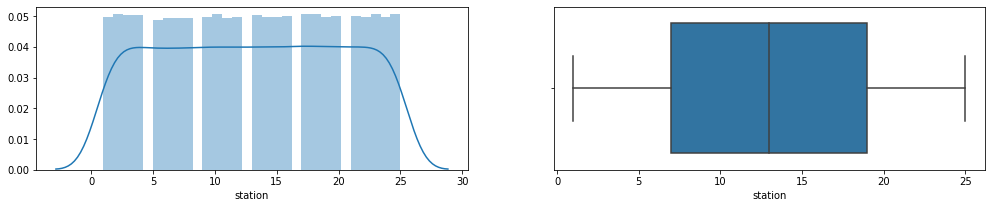

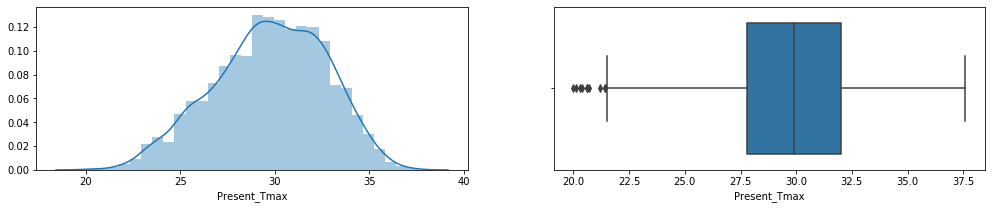

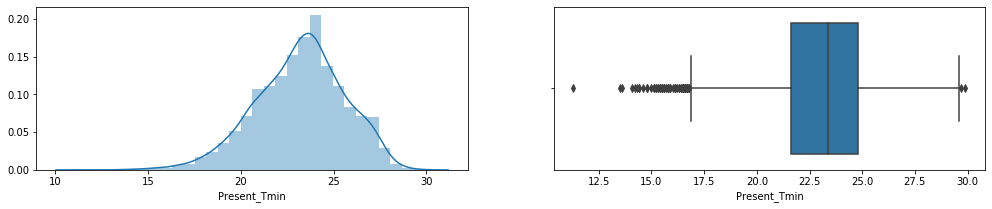

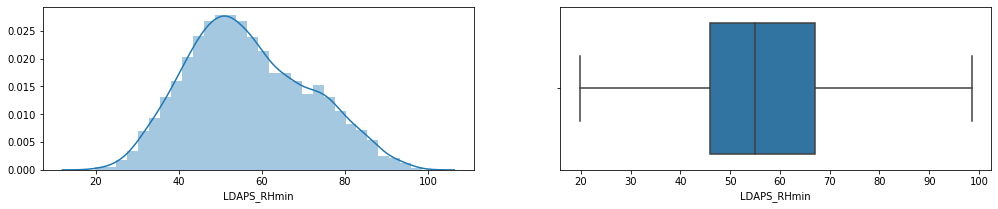

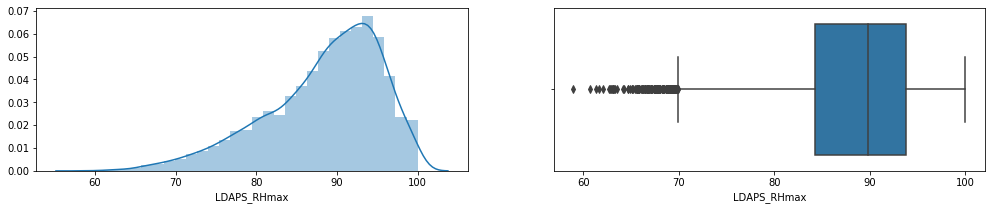

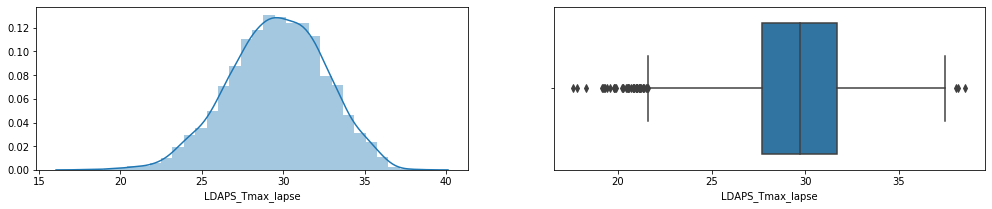

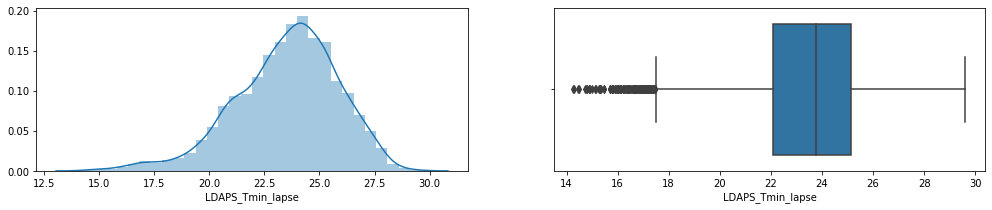

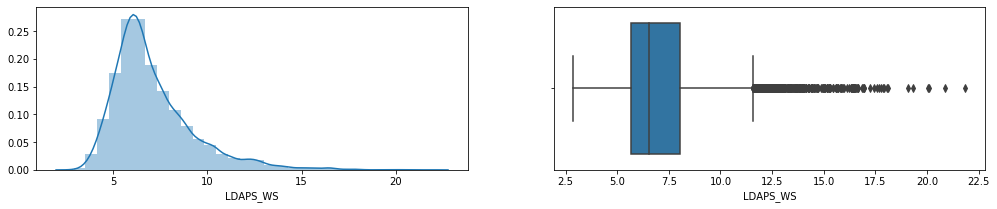

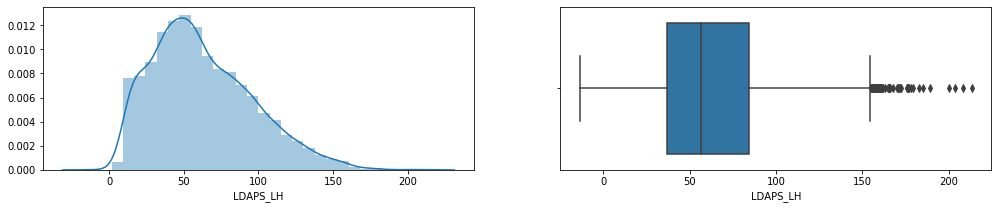

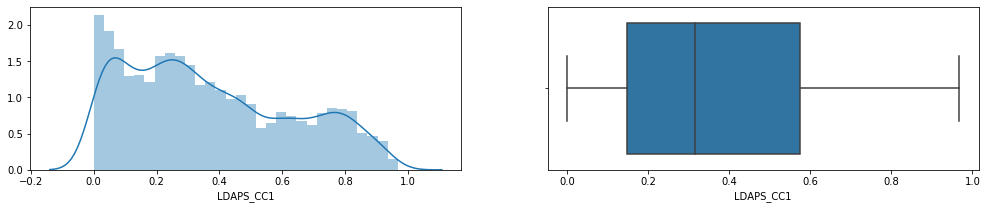

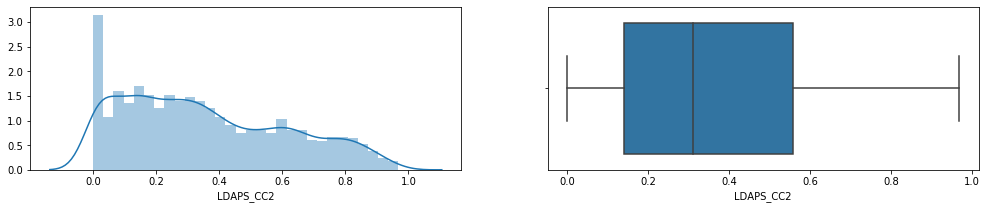

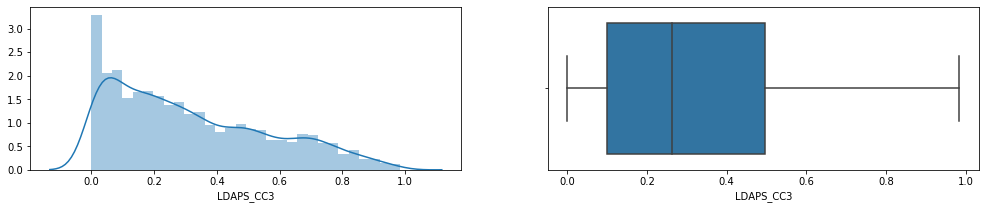

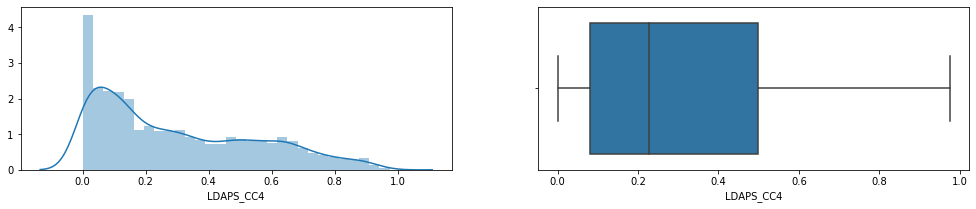

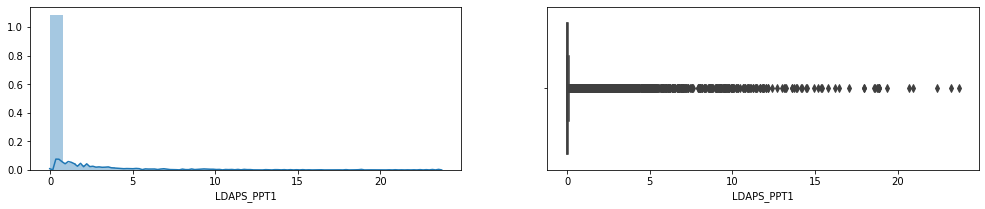

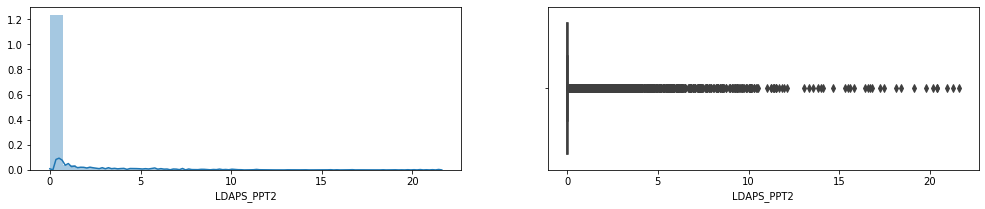

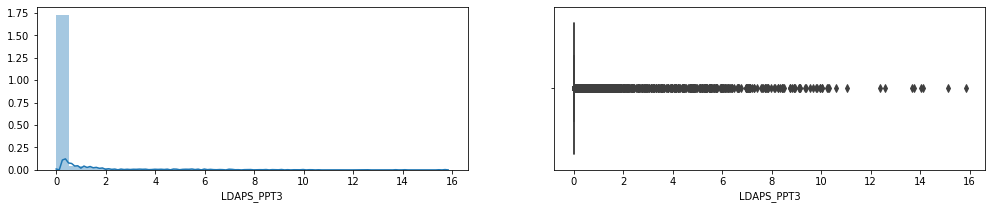

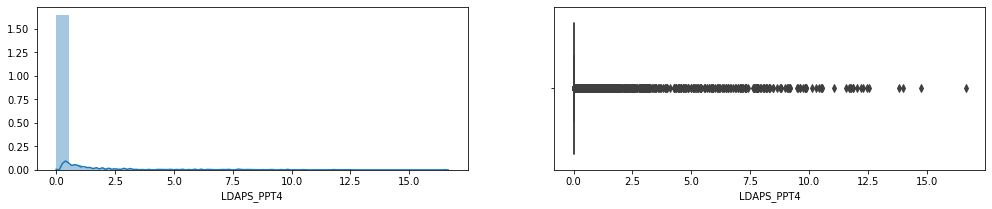

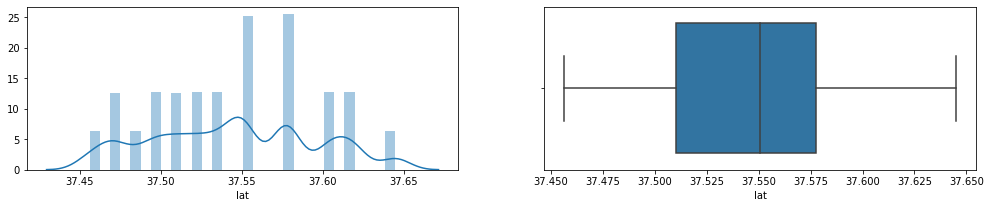

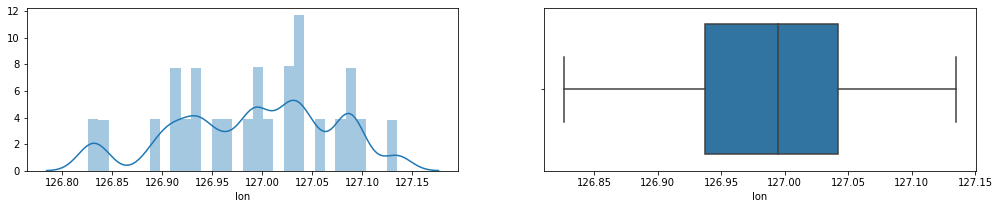

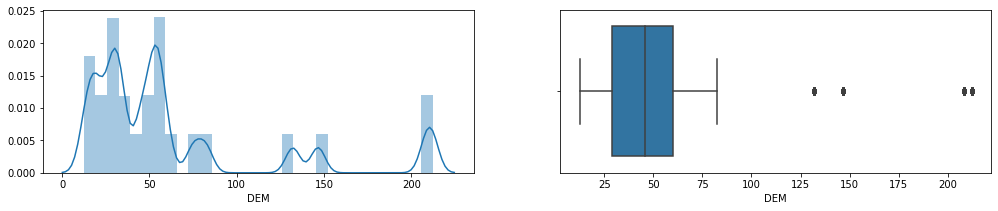

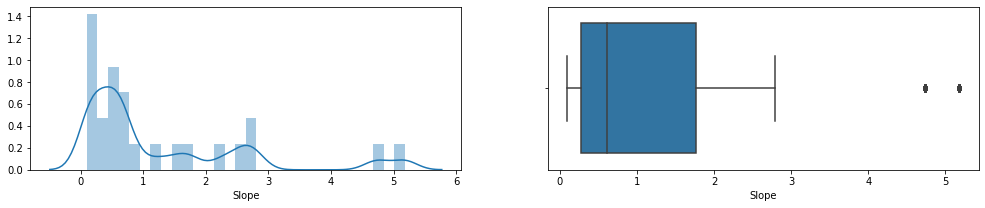

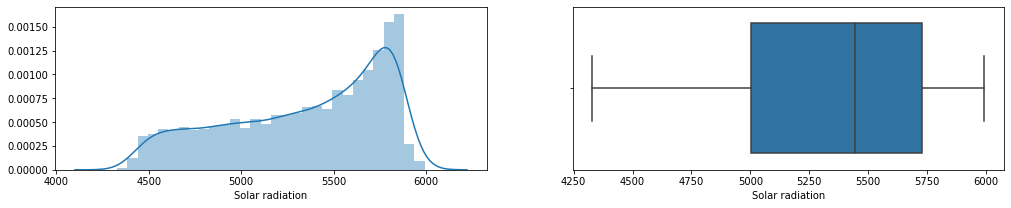

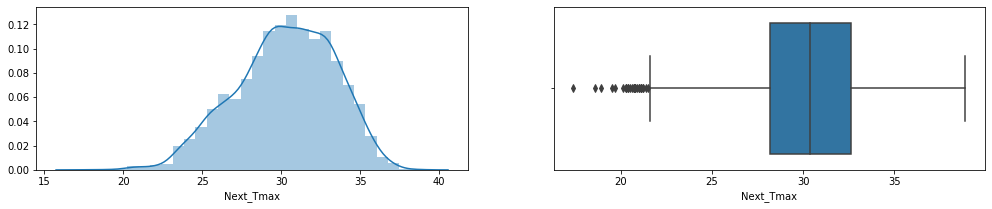

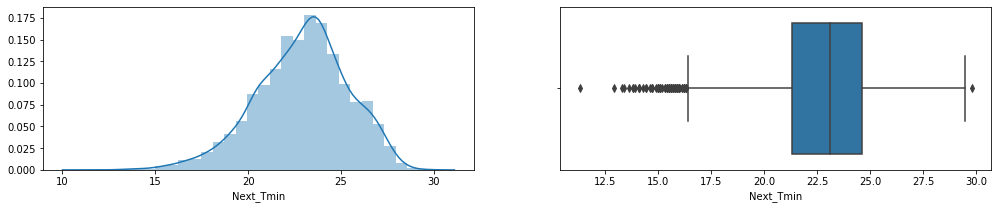

In [107]:
#Univariate analysis of numerical features

for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])

Observation:
    LDPAS_PPT1,LDPAS_PPT2,LDPAS_PPT3,LDPAS_PPT4, maximum values are concentrated
    at 0 and outliers are present in these features.
    Skewness present in many features.
    

In [108]:
#Dropping date column as it will nou contribute to output
df.drop(columns=['Date'],axis=1,inplace=True)

In [109]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


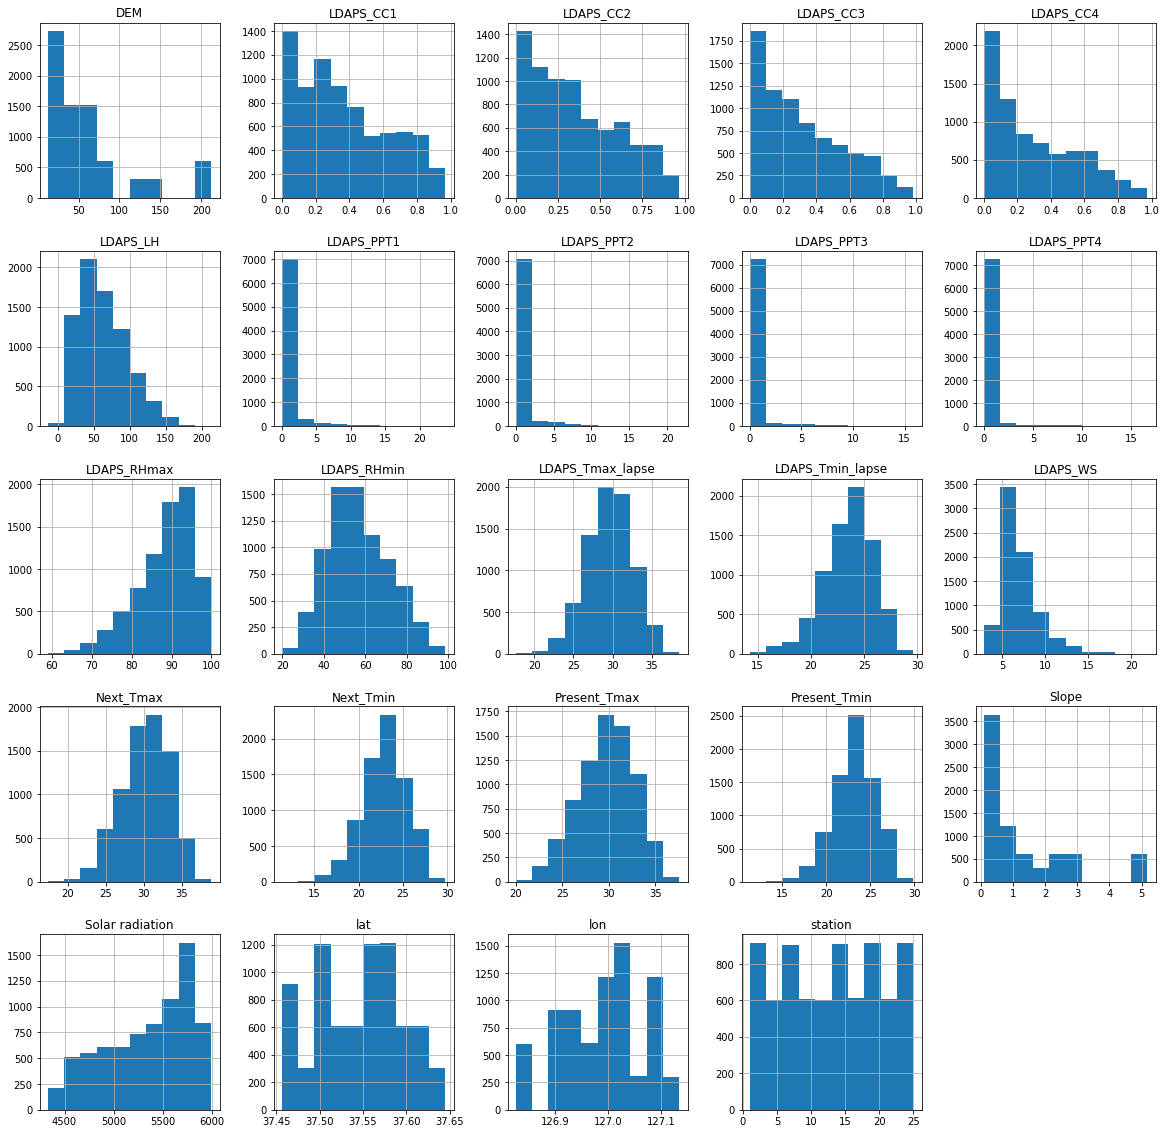

In [110]:
df.hist(figsize=(20,20))
plt.show()

In [111]:
#Checking Skewness

df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [112]:
print("Total count of numeric features:",len(df.skew()))
print("count of features which are significantly skewed:",len(df.skew().loc[abs(df.skew())>0.5]))

Total count of numeric features: 24
count of features which are significantly skewed: 13


Observation:
    among 24 features 13 features are skewed. 

### Removing Outliers

In [113]:
df.shape

(7588, 24)

In [114]:
#seperating categorical columns and numerical columns
cat_df,num_df=[],[]
for i in df.columns:
    if df[i].dtype=='O':
        cat_df.append(i)
    else:num_df.append(i)
print('cat_df>>\n',cat_df,'\nnum_df>>>\n',num_df)

cat_df>>
 [] 
num_df>>>
 ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']


In [115]:
from scipy.stats import zscore
z=np.abs(zscore(df[num_df]))
z

array([[1.66460654, 0.35331763, 0.74802891, ..., 1.51056517, 0.36686121,
        0.68926525],
       [1.52605214, 0.72513836, 0.66472063, ..., 1.22299734, 0.08306779,
        0.1655135 ],
       [1.38749775, 0.62403311, 0.0433998 , ..., 1.20960169, 0.27589451,
        0.39852685],
       ...,
       [1.38359018, 2.17321212, 2.53915704, ..., 2.09517477, 0.6239635 ,
        1.93821173],
       [1.52214457, 2.17321212, 2.28923218, ..., 2.10667071, 0.52755014,
        1.65619156],
       [1.66069897, 2.20691387, 2.41419461, ..., 2.07648676, 0.78465243,
        2.2202319 ]])

In [116]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [117]:
df=df[(z<3).all(axis=1)]


In [118]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [119]:
df.shape

(6739, 24)

849 rows are detected as outliers.

## Machine Learning Algorithms

In [120]:
#Splitting the data into input and output variable.

x=df.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)
y=pd.concat([df['Next_Tmax'],df['Next_Tmin']],axis=1)

In [121]:
print(x.shape,'\t\t',y.shape)

(6739, 22) 		 (6739, 2)


In [122]:
#Scaling input data
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x=ss.fit_transform(x)

In [123]:
#Splitting data into training and testing data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape:',x_train.shape,'x_test.shape:',x_test.shape)
print('y_train.shape:',y_train.shape,'y_test.shape:',y_test.shape)

x_train.shape: (5391, 22) x_test.shape: (1348, 22)
y_train.shape: (5391, 2) y_test.shape: (1348, 2)


In [124]:
#Importing all the modeel libraries

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score


In [125]:
from sklearn.metrics import mean_squared_error,r2_score
def models(model,x_train,x_test,y_train,y_test,score,rmse):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    score.append(model.score(x_train,y_train))
    rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    
    print('Score:',model.score(x_train,y_train))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('R2 Score:',r2_score(y_test,y_pred))

In [126]:
model_name,score,rmse=[],[],[]

In [127]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
mod='Linear Regression'
print('Model report for',mod)
models(lreg,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for Linear Regression
Score: 0.7876825765983283
RMSE: 1.2497641649327016
R2 Score: 0.7859425953411776


In [128]:
#Ridge regression
from sklearn.linear_model import Ridge
parameters={'alpha':[0.01,0.1,1]}
best=GridSearchCV(Ridge(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 1}

In [129]:
rr=Ridge(alpha=1)
mod='Ridge regression'
print('Model report for:',mod)
models(rr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for: Ridge regression
Score: 0.7876825121174487
RMSE: 1.2497703905806554
R2 Score: 0.7859397640267138


In [130]:
#Lasso Regression

from sklearn.linear_model import Lasso
parameters={'alpha':[0.001,0.01,0.1,1]}
best=GridSearchCV(Lasso(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 0.001}

In [131]:
lr=Lasso(alpha=0.001)
mod='Lasso Regression'
print('Model report for:',mod)
models(lr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for: Lasso Regression
Score: 0.7876758957984689
RMSE: 1.249394609421896
R2 Score: 0.7860609798920941


In [132]:
#ElasticNet
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.001)
mod='ElasticNet'
print('Model report for:',mod)
models(enr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for: ElasticNet
Score: 0.7876798974897854
RMSE: 1.2495934385149077
R2 Score: 0.7859953309227539


In [133]:
#KNeighbors Regressor

from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
mod='KNeighbors Regressor'
print('Model report for:',mod)
models(knr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for: KNeighbors Regressor
Score: 0.892407106560549
RMSE: 1.0713739480211928
R2 Score: 0.8414695096918672


In [134]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
parameters={'max_depth':[8,10,12,15],'min_samples_leaf':[100,150]}
best=GridSearchCV(DecisionTreeRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 10, 'min_samples_leaf': 100}

In [135]:
dtr=DecisionTreeRegressor(max_depth=10,min_samples_leaf=100)
mod='Decision Tree Regressor'
print('Model report for:',mod)
models(dtr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)
                 

Model report for: Decision Tree Regressor
Score: 0.7399515216927666
RMSE: 1.3968220499749398
R2 Score: 0.7277067625685623


In [143]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
parameters={'n_estimators':[200,300,400],'max_depth':[5,6]}
best=GridSearchCV(RandomForestRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 6, 'n_estimators': 300}

In [146]:
rfr=RandomForestRegressor(max_depth=6,n_estimators=300)
mod='Random Forest Regressor'
print('Model Report for:',mod)
models(rfr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for: Random Forest Regressor
Score: 0.8197584767810081
RMSE: 1.2075651735671278
R2 Score: 0.7952887224106092


In [148]:
#ExtraTrees Regressor
etr=ExtraTreesRegressor(n_estimators=10,random_state=42)
mod='Extra Trees Regressor'
print('Model report for:',mod)
models(etr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for: Extra Trees Regressor
Score: 1.0
RMSE: 0.8710339323332725
R2 Score: 0.8927938547667451


In [149]:
#storing the model in table
final=pd.DataFrame({'Model name':model_name,'Score':score,'RMSE':rmse})
final

,Model name,Score,RMSE
0,Linear Regression,0.787683,1.249764
1,Ridge regression,0.787683,1.249770
2,Lasso Regression,0.787676,1.249395
3,ElasticNet,0.787680,1.249593
4,KNeighbors Regressor,0.892407,1.071374
5,Decision Tree Regressor,0.739952,1.396822
6,Random Forest Regressor,0.819758,1.207565
7,Extra Trees Regressor,1.000000,0.871034


In [151]:
#Cross validation

model=[LinearRegression(),Ridge(alpha=1),Lasso(alpha=0.001),ElasticNet(alpha=0.001),
      KNeighborsRegressor(),DecisionTreeRegressor(max_depth=15,min_samples_leaf=100),
      RandomForestRegressor(n_estimators=300,max_depth=6),ExtraTreesRegressor(n_estimators=10,random_state=42)]

for m in model:
    score=cross_val_score(m,x,y,cv=15,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print("Mean Score:",score.mean())
    print("Standard deviation:",score.std())
    print('**************************************************************')
    print('\n')

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Score: [0.60830017 0.58879918 0.7797166  0.63563626 0.59872221 0.63145982
 0.73067985 0.55407078 0.67817723 0.76634204 0.55300723 0.7905984
 0.74564999 0.59080032 0.71728631]
Mean Score: 0.6646164258995615
Standard deviation: 0.08111031102602166
**************************************************************


Model: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Score: [0.60835978 0.58888392 0.77978016 0.63566863 0.59867942 0.63149085
 0.73062199 0.55405407 0.67818153 0.76632635 0.55309225 0.79064121
 0.74570741 0.59081922 0.71725799]
Mean Score: 0.6646376513634666
Standard deviation: 0.08110419485041932
**************************************************************


Model: Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
  

In [152]:
#Linear SVR with Multioutput regressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

In [154]:
model=LinearSVR()
wrapper=MultiOutputRegressor(model)
wrapper.fit(x_train,y_train)
wrapper.score(x_train,y_train)
pred_y=wrapper.predict(x_test)
print('Score of',m,'is:',score)
print('MAE:',mean_absolute_error,(y_test,pred_y))
print('MSE:',mean_squared_error(y_test,pred_y))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_y)))
print('R2_score:',r2_score(y_test,pred_y))

Score of ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=10, n_jobs=None, oob_score=False,
                    random_state=42, verbose=0, warm_start=False) is: [0.37623872 0.47934765 0.72182667 0.61439818 0.59753126 0.47869298
 0.69257481 0.45737901 0.63513494 0.6863233  0.51008746 0.77699734
 0.75863772 0.56103487 0.61866647]
MAE: <function mean_absolute_error at 0x000001825E114948> (      Next_Tmax  Next_Tmin
491        30.9       22.0
2867       30.2       21.8
5274       33.3       26.9
2344       35.1       23.7
2521       31.2       21.9
...         ...        ...
5321       29.9       26.5
5489       33.8       24.8
1257       33.0       23.6
3352    

In [155]:
LR=LinearRegression()
Ridge=Ridge(alpha=1,random_state=42)
Lasso=Lasso(alpha=0.001,random_state=42)
ElasticNet=ElasticNet(alpha=0.001,random_state=42)
KNR=KNeighborsRegressor(algorithm='auto',n_neighbors=15,weights='uniform')
DTR=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100,random_state=42)
RFR=RandomForestRegressor(n_estimators=300,max_depth=6)
ETR=ExtraTreesRegressor(n_estimators=10,random_state=42)

TypeError: 'Ridge' object is not callable

In [156]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Ridge',Ridge))
models.append(('Lasso',Lasso))
models.append(('ElasticNet',ElasticNet))
models.append(('KNeighborsRegressor',KNR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('ExtraTreesRegressor',ETR))

In [157]:
Model=[]
Score=[]
R2_Score=[]
CVS=[]
MAE=[]
MSE=[]
RMSE=[]

for name,model in models:
    print('**************************',name,'*********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    
    #Score
    score=model.score(x_train,y_train)
    print('Score:',score)
    Score.append(score*100)
    print('\n')
    pred=model.predict(x_test)
    print('\n')
    
    # r2 Score
    r_score=r2_score(y_test,pred)
    print('R2 score:',r_score)
    R2_Score.append(r_score*100)    
    print('\n')
    
    #Cross val score
    cross_val=cross_val_score(model,x,y,cv=15,scoring='r2').mean()
    print('Cross Val score:',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #MAE
    mae=mean_absolute_error(y_test,pred)
    print('MAE:',mae)
    MAE.append(mae)
    print('\n')
    
    #MSE
    mse=mean_squared_error(y_test,pred)
    print('MSE:',mse)
    MSE.append(mse)
    print('\n')
    
    #RMSE
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE:',rmse)
    RMSE.append(rmse)
    print('\n\n')
         

************************** LinearRegression *********************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Score: 0.7876825765983283




R2 score: 0.7859425953411776


Cross Val score: 0.6646164258995615


MAE: 0.954252826406678


MSE: 1.5619104679499332


RMSE: 1.2497641649327016



************************** Ridge *********************


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)
Score: 0.7876825121174487




R2 score: 0.7859397640267138


Cross Val score: 0.6646376513634666


MAE: 0.9542472642809853


MSE: 1.561926029172124


RMSE: 1.2497703905806554



************************** Lasso *********************


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)
Score: 0.7876758957984689




R2 score: 0.78606097989209

In [161]:
#Storing result in DataFrame
result=pd.DataFrame({'Model':Model,'Score':Score,'R2_Score':R2_Score,'Cross_Val_Score':CVS,
                    'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
result

,Model,Score,R2_Score,Cross_Val_Score,MAE,MSE,RMSE
0,LinearRegression,78.768258,78.594260,66.461643,0.954253,1.561910,1.249764
1,Ridge,78.768251,78.593976,66.463765,0.954247,1.561926,1.249770
2,Lasso,78.767590,78.606098,66.493954,0.953790,1.560987,1.249395
3,ElasticNet,78.767990,78.599533,66.484832,0.954009,1.561484,1.249593
4,KNeighborsRegressor,84.412537,81.976031,52.166160,0.873539,1.303226,1.141589
5,DecisionTreeRegressor,73.995152,72.770676,51.417184,1.088638,1.951112,1.396822
6,RandomForestRegressor,81.949012,79.462653,59.270015,0.945710,1.463259,1.209652
7,ExtraTreesRegressor,100.000000,89.279385,59.765809,0.660174,0.758700,0.871034


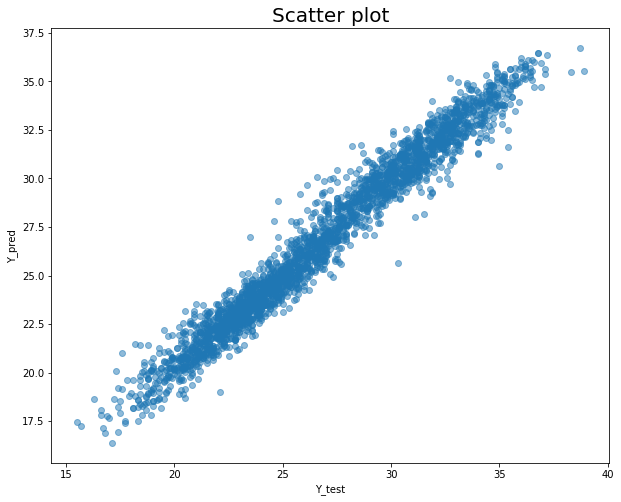

In [159]:
#Scatter plot betwween test data and predicted data for Extra Tree Regressor
plt.figure(figsize=(10,8))
plt.scatter(y_test,ETR.predict(x_test),alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot",fontsize=20)
plt.show()

In [160]:
#Saving the model
from sklearn.externals import joblib
from joblib import dump

joblib.dump(ETR,'ETR_Bias_Correction_ucl.pkl')



['ETR_Bias_Correction_ucl.pkl']